In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("train.csv")
columns_to_analyze = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

## Кількість рядків

In [3]:
data.shape[0]

159571

## Розподіл відсутніх значень

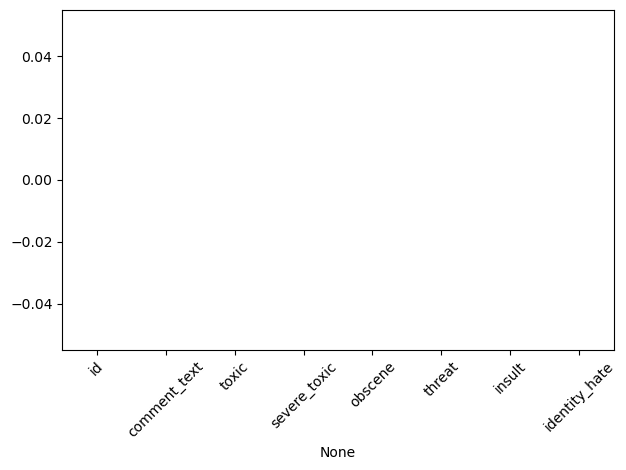

In [4]:
missing_values = data.isnull().sum()

sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Розподіл ознак

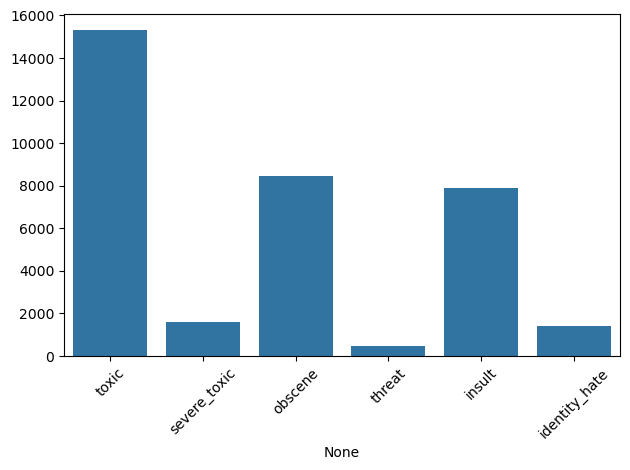

In [5]:
distribution = data[columns_to_analyze].sum()

sns.barplot(x=distribution.index, y=distribution.values)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Довжина коментаріїв

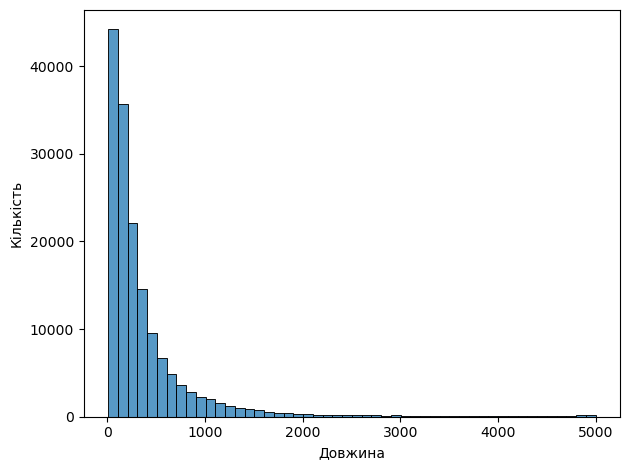

In [6]:
data['comment_length'] = data['comment_text'].apply(len)
comment_length_distribution = data['comment_length']

sns.histplot(comment_length_distribution, bins=50)
plt.xlabel("Довжина")
plt.ylabel("Кількість")
plt.tight_layout()
plt.show()

## Співвідношення значень для кожної з ознак

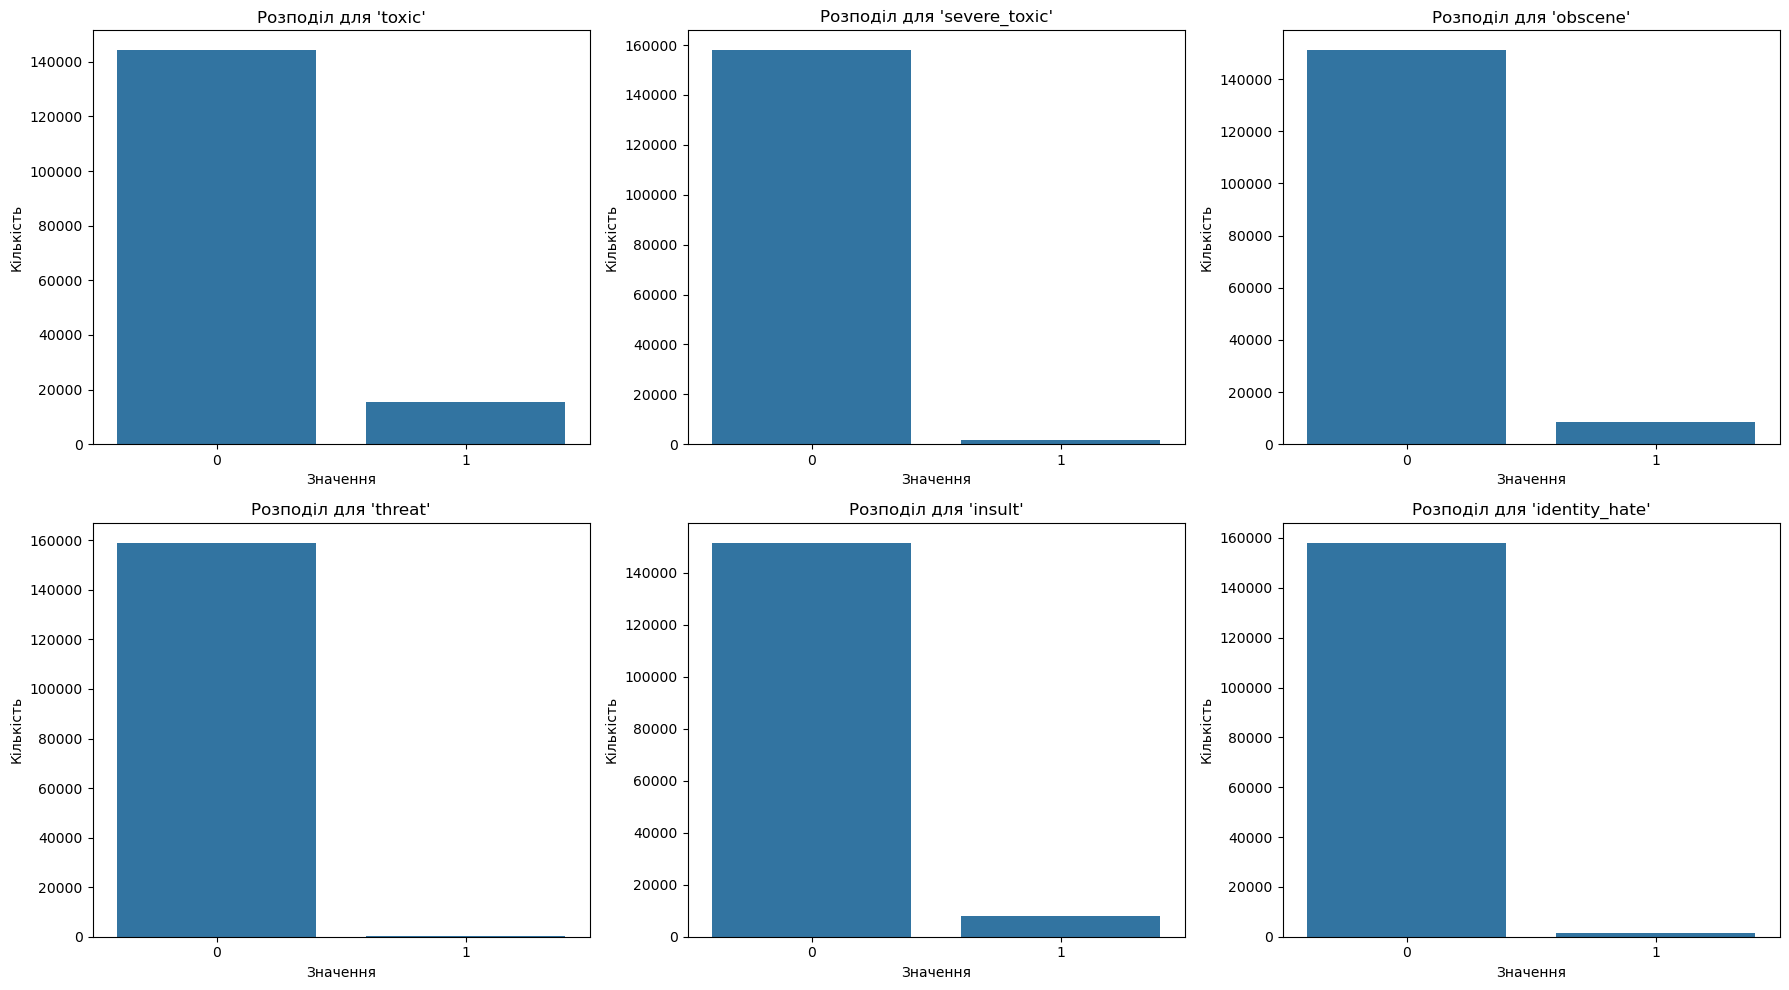

In [7]:
plt.figure(figsize=(18, 10))

for i, column in enumerate(columns_to_analyze, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=column, data=data)
    plt.title(f"Розподіл для '{column}'")
    plt.xlabel('Значення')
    plt.ylabel('Кількість')

plt.tight_layout()
plt.show()

## Співвідношення між будь-яким токсичною ознакою та ознакою toxic

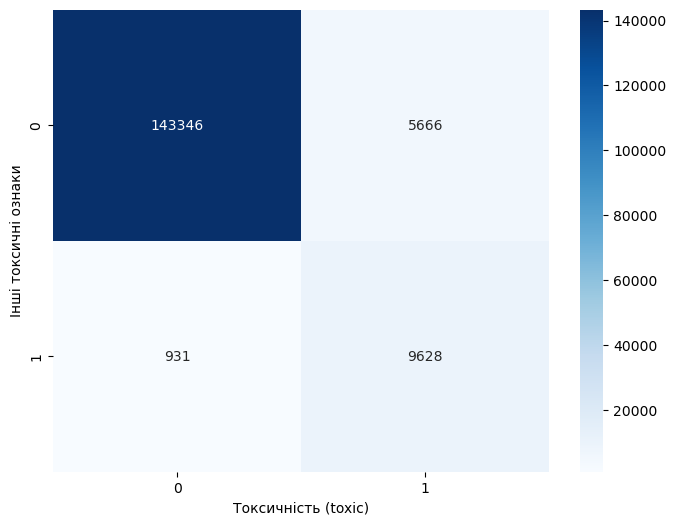

In [8]:
data['any_toxic_feature'] = data[columns_to_analyze[1:]].max(axis=1)

toxic_comparison = pd.crosstab(data['any_toxic_feature'], data['toxic'])

plt.figure(figsize=(8, 6))
sns.heatmap(toxic_comparison, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Токсичність (toxic)')
plt.ylabel('Інші токсичні ознаки')
plt.show()

## Ймовірність токсичності коментаріїв в залежності від кількості токсичних ознак

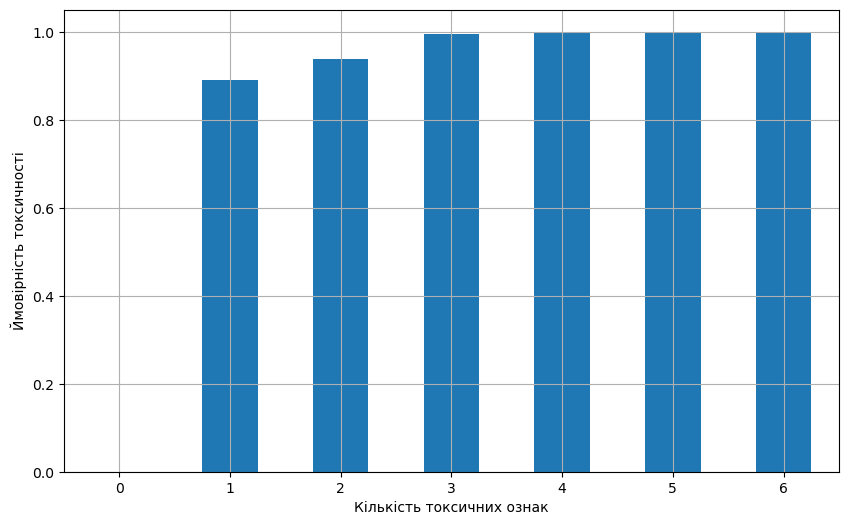

In [9]:
data['toxic_features_count'] = data[columns_to_analyze].sum(axis=1)

toxic_probability = data.groupby('toxic_features_count')['toxic'].mean()

plt.figure(figsize=(10, 6))
toxic_probability.plot(kind='bar')
plt.xlabel("Кількість токсичних ознак")
plt.ylabel("Ймовірність токсичності")
plt.xticks(rotation=0)
plt.grid()
plt.show()

## Співвідношення коментаріїв з токсичності та без

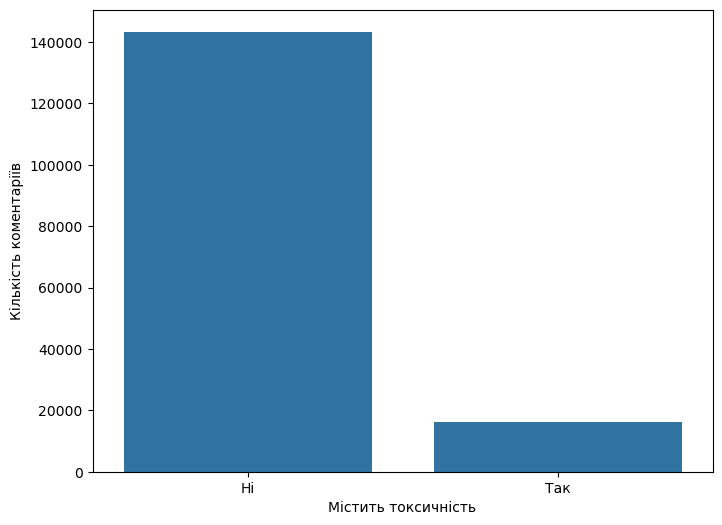

In [10]:
data['contains_toxicity'] = data[columns_to_analyze].sum(axis=1) > 0

toxicity_distribution = data['contains_toxicity'].value_counts()


plt.figure(figsize=(8, 6))
sns.barplot(x=toxicity_distribution.index, y=toxicity_distribution.values)
plt.xlabel('Містить токсичність')
plt.ylabel('Кількість коментаріїв')
plt.xticks([0, 1], ['Ні', 'Так'])
plt.show()

## Розподіл кількості унікальних слів в коментаріях

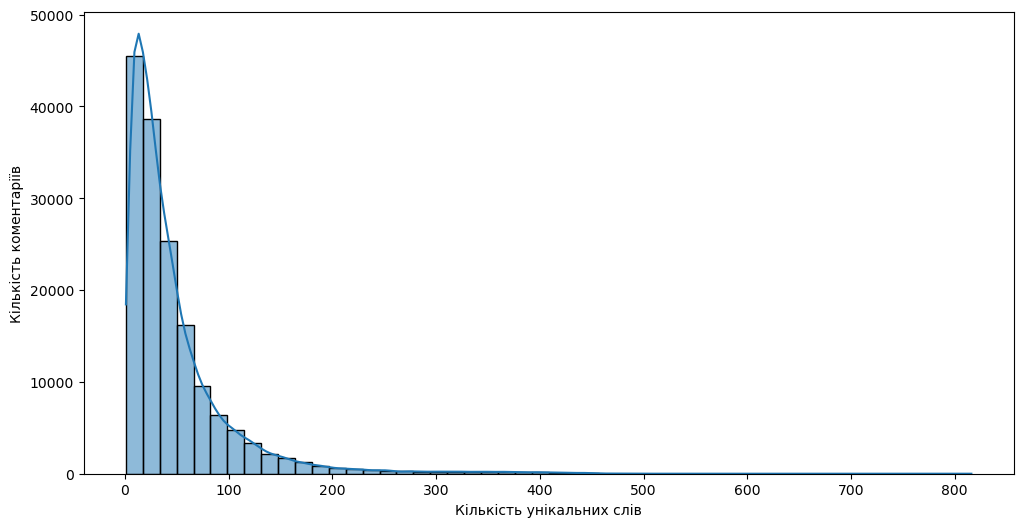

In [11]:
data['unique_word_count'] = data['comment_text'].apply(lambda x: len(set(x.split())))

plt.figure(figsize=(12, 6))
sns.histplot(data['unique_word_count'], bins=50, kde=True)
plt.xlabel("Кількість унікальних слів")
plt.ylabel("Кількість коментаріїв")

plt.show()